Analysis
As you get colser to the equator the temp increases
lattitude or longititude has no impact on clouds
Southern hemisphere is warmer than northern hemisphere because it's summer there and winter here

Setup

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import seaborn as sns
import openweathermapy.core as owm
import csv
# Import API key for gmaps
#from config import gkey

#Import API for open weather
#from config import api_key
api_key = "f51381799eb995c69b073fdfce892a3f"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Generate Cities List (using the starter code)

In [23]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #this is where you change the size to get the number that you want
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

 Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [24]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}


# the header of the print log
print("Beginning Data Retrieval from OpenWeather:")
print("------------------------------------------")

# created a city dictionary to build dataframe
city_dict = {}

# created a city list of the cities found with the request
city_list = []

# row count will allow the city numbering while requesting
row_count = 1


for city in cities: 
    try:
        current_city = owm.get_current(city, **settings)
        city_dict[city] = current_city
        city_list.append(city)
        
        print(f'Processing | {city} #{row_count}')
        row_count += 1
    except:
        print("----------------------------------------------")
        print(f'{city} does not exist, searching next city...')
        print("----------------------------------------------")
        
# the footer of the print log     
print("-------------------")
print(f'Processing Complete')

Beginning Data Retrieval from OpenWeather:
------------------------------------------
Processing | bakel #1
Processing | tuktoyaktuk #2
----------------------------------------------
sentyabrskiy does not exist, searching next city...
----------------------------------------------
Processing | albany #3
Processing | tuatapere #4
Processing | mongar #5
Processing | ushuaia #6
Processing | vaini #7
Processing | leningradskiy #8
Processing | qaanaaq #9
Processing | caravelas #10
Processing | srednekolymsk #11
Processing | chitipa #12
Processing | uyemskiy #13
----------------------------------------------
bengkulu does not exist, searching next city...
----------------------------------------------
Processing | mount darwin #14
Processing | puerto ayora #15
Processing | karwar #16
----------------------------------------------
barentsburg does not exist, searching next city...
----------------------------------------------
Processing | rikitea #17
Processing | touros #18
Processing | niko

Processing | lorengau #187
Processing | portland #188
Processing | necochea #189
Processing | hervey bay #190
----------------------------------------------
krasnoselkup does not exist, searching next city...
----------------------------------------------
Processing | skibotn #191
Processing | meulaboh #192
Processing | batemans bay #193
----------------------------------------------
saleaula does not exist, searching next city...
----------------------------------------------
Processing | englewood #194
Processing | shache #195
Processing | tuy hoa #196
Processing | changping #197
Processing | kahului #198
Processing | floro #199
Processing | mastic beach #200
Processing | manta #201
----------------------------------------------
raga does not exist, searching next city...
----------------------------------------------
Processing | okato #202
----------------------------------------------
kamenskoye does not exist, searching next city...
----------------------------------------------


Processing | inhambane #356
Processing | rosarito #357
Processing | hobyo #358
Processing | carauari #359
Processing | tateyama #360
Processing | kidal #361
Processing | ponta do sol #362
Processing | kommunisticheskiy #363
Processing | cap-aux-meules #364
Processing | koulikoro #365
Processing | los llanos de aridane #366
Processing | acajutla #367
Processing | namie #368
Processing | gao #369
Processing | port hardy #370
Processing | rawson #371
Processing | whitehorse #372
Processing | hueyapan #373
Processing | bang saphan #374
Processing | qaqortoq #375
Processing | san angelo #376
----------------------------------------------
tumannyy does not exist, searching next city...
----------------------------------------------
----------------------------------------------
nizhneyansk does not exist, searching next city...
----------------------------------------------
Processing | aklavik #377
Processing | zabol #378
----------------------------------------------
kismayo does not exist

In [25]:
with open('cities.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in city_dict.items():
       writer.writerow([key, value])
    

In [26]:

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
name=[]
for city in city_list:
    
    city_name.append(city_dict[city]["name"])
    cloudiness.append(city_dict[city]["clouds"]["all"])
    country.append(city_dict[city]["sys"]["country"])
    date.append(city_dict[city]["dt"]) 
    humidity.append(city_dict[city]["main"]["humidity"])
    max_temp.append(city_dict[city]["main"]["temp_max"])
    lat.append(city_dict[city]["coord"]["lat"])
    lng.append(city_dict[city]["coord"]["lon"])
    wind_speed.append(city_dict[city]["wind"]["speed"])
    city_record = city_dict[city]["name"]

In [6]:
date #testing my work

[1548383400,
 1548386568,
 1548386568,
 1548386568,
 1548386569,
 1548386569,
 1548386569,
 1548384900,
 1548385200,
 1548386570,
 1548386570,
 1548385200,
 1548386570,
 1548386571,
 1548386571,
 1548386571,
 1548386571,
 1548384600,
 1548386572,
 1548383400,
 1548385200,
 1548384900,
 1548385200,
 1548386573,
 1548384960,
 1548385200,
 1548386574,
 1548386574,
 1548383340,
 1548386575,
 1548386575,
 1548385200,
 1548386575,
 1548386576,
 1548385200,
 1548386576,
 1548386576,
 1548384960,
 1548386577,
 1548386577,
 1548385200,
 1548386577,
 1548385620,
 1548385200,
 1548386578,
 1548386578,
 1548385200,
 1548386579,
 1548385200,
 1548386579,
 1548385200,
 1548385200,
 1548386580,
 1548386580,
 1548386325,
 1548385080,
 1548386581,
 1548385080,
 1548386581,
 1548386581,
 1548385200,
 1548386582,
 1548386582,
 1548384780,
 1548385200,
 1548381600,
 1548386583,
 1548386583,
 1548386583,
 1548385200,
 1548381180,
 1548385200,
 1548386584,
 1548386584]

In [27]:

newWeather = pd.DataFrame({
    "Latitude": lat,
    "Longitude": lng,
    "City Name": city_list,
    "Country": country,
    "Wind Speed": wind_speed,
    "Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
  
})

newWeather.head()

,Latitude,Longitude,City Name,Country,Wind Speed,Temperature,Humidity,Cloudiness
0,14.90,-12.46,bakel,SN,2.84,60.50,60,8
1,69.44,-133.03,tuktoyaktuk,CA,2.24,-14.81,75,5
2,42.65,-73.75,albany,US,6.93,32.00,65,90
3,-46.13,167.69,tuatapere,NZ,13.35,56.09,95,92
4,27.28,91.24,mongar,BT,1.61,56.27,62,64


Convert Raw Data to DataFrame



 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

 Latitude vs. Temperature Plot

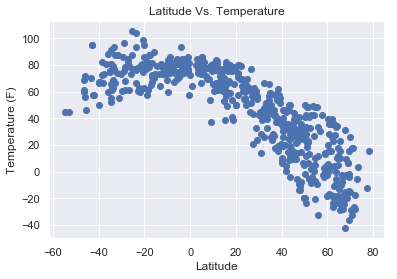

In [28]:
#Latitude Vs Temperature Scatter Plot
plt.scatter(newWeather["Latitude"],newWeather["Temperature"],marker ="o")
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.show()

 Latitude vs. Humidity Plot

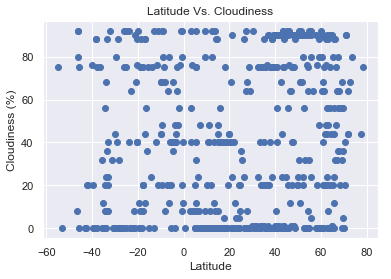

In [29]:
#Cloudiness Vs. Latitude Scatter Plot
plt.scatter(newWeather["Latitude"],newWeather["Cloudiness"],marker ="o")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.show()

 Latitude vs. Cloudiness Plot

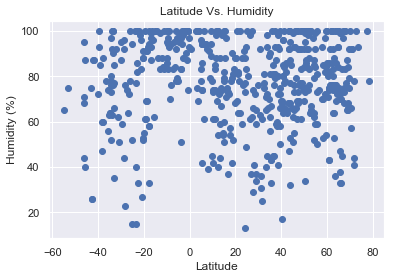

In [30]:
#Humidity Vs. Latitude Scatter Plot
plt.scatter(newWeather["Latitude"],newWeather["Humidity"],marker ="o")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.show()

 Latitude vs. Wind Speed Plot

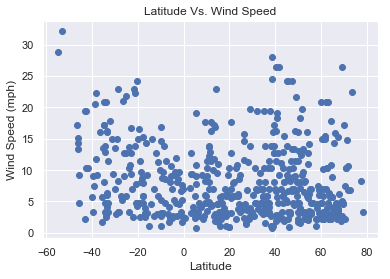

In [31]:
#Wind Speed Vs. Latitude Scatter Plot
plt.scatter(newWeather["Latitude"],newWeather["Wind Speed"],marker ="o")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.show()